In [1]:
import soundfile as sf
import numpy as np
import os
from os.path import join as pjoin
import tqdm
import pandas as pd

In [2]:
dataset_path = '/home/ubuntu/Data/guso_in24_rirs/'
df = pd.read_csv(pjoin(dataset_path, 'meta_ins24.csv'))

In [3]:
sets = ['train', 'val', 'test']

In [4]:
folders = os.listdir(pjoin(dataset_path, 'train'))

In [5]:
out = '/home/ubuntu/Data/'

In [6]:
train = df[df['set'] == 'train']
val  = df[df['set'] == 'val']
test = df[df['set'] == 'test']

In [7]:
folders = ['recsourcedirectivityHA_right']

In [8]:
for set in sets:
    for folder in folders:
        files = os.listdir(pjoin(pjoin(dataset_path, set), folder))
        for file in tqdm.tqdm(files):
            file_path = pjoin(pjoin(pjoin(dataset_path, set), folder), file)
            audio, fs = sf.read(file_path)
            if fs != 48000:
                print(file, 'fs')
            if len(audio) == 0:
                print(file, 'len')
            if np.any(audio > 1.0):
                print(file, 'clip')
            if np.any(audio < -1.0):
                print(file, 'clip')
            if np.any(np.isnan(audio)):
                print(file, 'nan')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8997/8997 [05:19<00:00, 28.14it/s]


In [19]:
x, _ =sf.read(pjoin(pjoin(pjoin(dataset_path, 'train'), folder), 'recsourcedirectivityHA_right_08321 .wav'))

In [15]:
import matplotlib.pyplot as plt

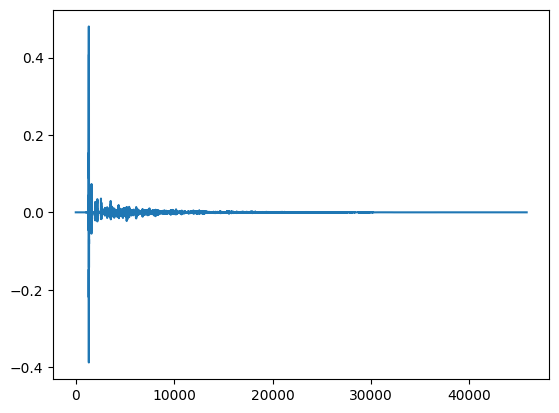

In [20]:
plt.plot(x)

In [ ]:
nan_idxs[0].split('/')[-1]

In [ ]:
wrong = [x.split('/')[-1] for x in nan_idxs]

In [ ]:
for set in sets:
    for folder in folders:
        files = os.listdir(pjoin(pjoin(dataset_path, set), folder))
        for f in files:
            if f in wrong:
                print('removing: ')
                print(pjoin(pjoin(pjoin(dataset_path, set), folder), f))
                os.remove(pjoin(pjoin(pjoin(dataset_path, set), folder), f))

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/home/ubuntu/Data/guso_in24_rirs/meta_ins24.csv')

In [ ]:
]

In [ ]:
df

In [ ]:
wrong_ids = [int(x.split('.')[0]) for x in wrong]

In [ ]:
wrong_ids

In [ ]:
for wrong_id in wrong_ids:
    df = df.drop(df[df['id'] == wrong_id].index)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

In [ ]:
#df = pd.to('/home/ubuntu/Data/guso_in24_rirs/meta_ins24.csv')
df.to_csv('/home/ubuntu/Data/guso_in24_rirs/meta_ins24.csv', index=False, compression='infer')